

# 📝 Exercises: Probability Distributions & Z-Scores

---

## **Part A**

### Normal Distribution

1. A student’s test scores follow $(N(70, 10^2))$. What percentage of students score **between 60 and 80**?
2. IQ scores follow $(N(100, 15^2))$. What proportion of people have an IQ **above 130**?
3. Heights of men are normally distributed with μ = 175 cm, σ = 8 cm. Find the height corresponding to the **90th percentile**.

---

### Binomial Distribution

4. A coin is flipped 10 times. Find the probability of getting exactly 6 heads.
5. A multiple-choice quiz has 20 questions, each with 4 options. If a student guesses all answers, what is the probability of getting **at least 5 correct**?
6. A factory has a defect rate of 5%. If 100 items are inspected, find the expected number of defects and the probability of getting **more than 7 defects**.

---

### Poisson Distribution

7. A call center receives on average 4 calls per minute. Find the probability of receiving:
   a) Exactly 3 calls in a minute.
   b) At most 2 calls in a minute.
8. A traffic light malfunction happens on average 3 times a week. What is the probability that it malfunctions **more than 5 times in a week**?

---

### Exponential Distribution

9. The average waiting time for a bus is 10 minutes. What is the probability that a passenger waits **less than 5 minutes**?
10. A machine has an average lifetime of 3 years (exponential distribution). What is the probability it lasts **longer than 5 years**?

---

### Z-scores & Standard Normal

11. A student scores 85 on a test with μ=70, σ=10. Find the **Z-score**.
12. Compare: Alice scores 90 on a math test (μ=80, σ=5), and Bob scores 75 on an English test (μ=60, σ=10). Who performed better **relative to their group**?
13. In a population, Z=2 corresponds to what percentile?

---

## **Part B: Python Exercises (Hands-On)**

### Normal Distribution

14. Generate 1000 random values from (N(0,1)). Plot the histogram and overlay the PDF curve.
15. Simulate exam scores with μ=70, σ=10 for 500 students. Find:

* Mean, std
* % of students scoring above 85.

---

### Binomial Distribution

16. Simulate 1000 experiments of tossing a coin 20 times. Plot the distribution of “number of heads”.
17. Use `scipy.stats.binom` to compute the probability of getting **at least 15 heads in 20 tosses**.

---

### Poisson Distribution

18. Generate 1000 samples from Poisson(λ=3). Plot the histogram.
19. A hospital receives an average of 6 patients per hour. Simulate patient arrivals for 100 hours. Plot the distribution.

---

### Exponential Distribution

20. Generate 500 samples from Exponential(λ=0.5). Plot histogram & PDF.
21. Estimate the probability that waiting time is less than 2 units. Compare empirical vs theoretical result.

---

### Z-scores

22. Write a Python function `z_scores(data)` to compute Z-scores for a dataset. Test it on `[70, 85, 90, 60, 75]`.
23. Simulate 200 test scores from (N(50, 12)). Standardize them into Z-scores and confirm mean ≈ 0 and std ≈ 1.

---

## **Part C: Advanced Problems**

24. The probability of a machine failing per day is 0.01. What is the probability it fails **exactly twice in 200 days**? (Binomial approximation to Poisson).
25. The time between arrivals at a café follows Exponential $(λ=1/5)$. What is the probability of waiting **more than 15 minutes**?
26. Derive and verify in Python that the mean of Poisson(λ) is λ and variance is also λ.
27. Standardize a dataset of exam scores (any random normal data). Show how Z-scores help compare across different distributions.
28. Simulate 10,000 coin flips. Compare theoretical vs empirical probabilities for different outcomes.
29. Fit a normal distribution to a dataset (e.g., random exam scores). Estimate μ, σ using `scipy.stats.norm.fit()`.
30. Create a mini-project: **Customer Arrivals** → Assume arrivals follow Poisson $(λ=5/hour)$, waiting times Exponential(λ=5). Simulate for 100 hours and analyze distribution of arrivals & wait times.

---



# 📘 Probability Distributions & Z-Scores Exercises - Python Solutions


In [17]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
sns.set(style='whitegrid')

-----------------------------
# Part A: Conceptual Calculations
-----------------------------

In [19]:
# 1. Normal Distribution: P(60 <= X <= 80) for N(70,10^2)
mu, sigma = 70, 10
p1 = stats.norm.cdf(80, mu, sigma) - stats.norm.cdf(60, mu, sigma)
print("1. P(60 <= X <= 80) =", p1)


1. P(60 <= X <= 80) = 0.6826894921370859


In [20]:
# 2. IQ above 130: N(100,15^2)
p2 = 1 - stats.norm.cdf(130, 100, 15)
print("2. P(X > 130) =", p2)

2. P(X > 130) = 0.02275013194817921


In [21]:
# 3. Height at 90th percentile: N(175, 8^2)
height_90 = stats.norm.ppf(0.9, 175, 8)
print("3. Height at 90th percentile =", height_90)

3. Height at 90th percentile = 185.2524125243568


-----------------------------
# Binomial Distribution
-----------------------------

In [22]:
# 4. Coin flipped 10 times, exactly 6 heads
p4 = stats.binom.pmf(6, 10, 0.5)
print("4. P(X=6) =", p4)

4. P(X=6) = 0.2050781249999999


In [23]:
# 5. MCQ: 20 questions, 4 options, at least 5 correct
p5 = 1 - stats.binom.cdf(4, 20, 0.25)
print("5. P(X>=5) =", p5)

5. P(X>=5) = 0.5851584974698198


In [24]:
# 6. Factory defects: 5% defect rate, 100 items, P(X>7)
mu6 = 100*0.05
p6 = 1 - stats.binom.cdf(7, 100, 0.05)
print("6. Expected defects =", mu6, ", P(X>7) =", p6)


6. Expected defects = 5.0 , P(X>7) = 0.12796047862037896


-----------------------------
# Poisson Distribution
-----------------------------

In [25]:
# 7. Call center: lambda = 4 calls/min
p7a = stats.poisson.pmf(3, 4)
p7b = stats.poisson.cdf(2, 4)
print("7a. P(X=3) =", p7a)
print("7b. P(X<=2) =", p7b)

7a. P(X=3) = 0.19536681481316454
7b. P(X<=2) = 0.23810330555354436


In [26]:
# 8. Traffic light: lambda=3/week, P(X>5)
p8 = 1 - stats.poisson.cdf(5, 3)
print("8. P(X>5) =", p8)


8. P(X>5) = 0.08391794203130343


-----------------------------
# Exponential Distribution
-----------------------------

In [27]:
# 9. Bus waiting: avg 10 mins, P(wait < 5)
lambda9 = 1/10
p9 = stats.expon.cdf(5, scale=1/lambda9)
print("9. P(wait < 5) =", p9)

9. P(wait < 5) = 0.3934693402873666


In [28]:
# 10. Machine lifetime >5 years, mean 3 years
lambda10 = 1/3
p10 = 1 - stats.expon.cdf(5, scale=1/lambda10)
print("10. P(lifetime > 5) =", p10)


10. P(lifetime > 5) = 0.18887560283756177


-----------------------------
# Z-scores
-----------------------------

In [29]:
# 11. Student score 85, mu=70, sigma=10
z11 = (85 - 70)/10
print("11. Z-score =", z11)


11. Z-score = 1.5


In [30]:
# 12. Alice vs Bob
z_alice = (90-80)/5
z_bob = (75-60)/10
print("12. Z Alice =", z_alice, ", Z Bob =", z_bob, ", Alice performed better")


12. Z Alice = 2.0 , Z Bob = 1.5 , Alice performed better


In [31]:
# 13. Z=2 percentile
percentile13 = stats.norm.cdf(2)*100
print("13. Percentile for Z=2 =", percentile13)


13. Percentile for Z=2 = 97.72498680518208


-----------------------------
# Part B: Python Simulations
-----------------------------

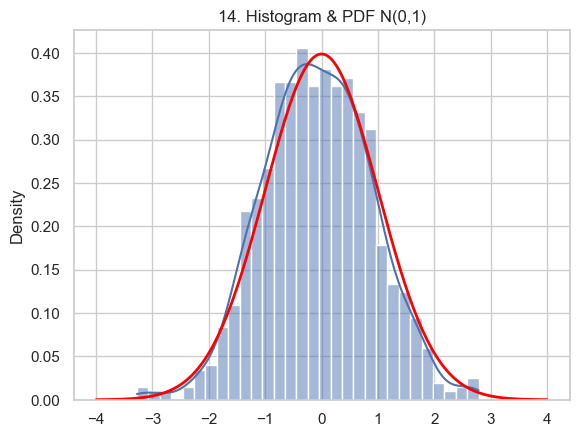

In [32]:
# 14. Generate N(0,1) 1000 values, plot histogram + PDF
data14 = np.random.randn(1000)
sns.histplot(data14, bins=30, kde=True, stat='density')
x = np.linspace(-4,4,200)
plt.plot(x, stats.norm.pdf(x,0,1), color='red', lw=2)
plt.title("14. Histogram & PDF N(0,1)")
plt.show()

In [33]:
# 15. Simulate exam scores μ=70, σ=10 for 500 students
scores15 = np.random.normal(70, 10, 500)
print("15. Mean =", scores15.mean(), ", Std =", scores15.std())
pct_above85 = np.sum(scores15>85)/500
print("15. % above 85 =", pct_above85*100)

15. Mean = 70.15904390455768 , Std = 10.09374910028153
15. % above 85 = 9.0


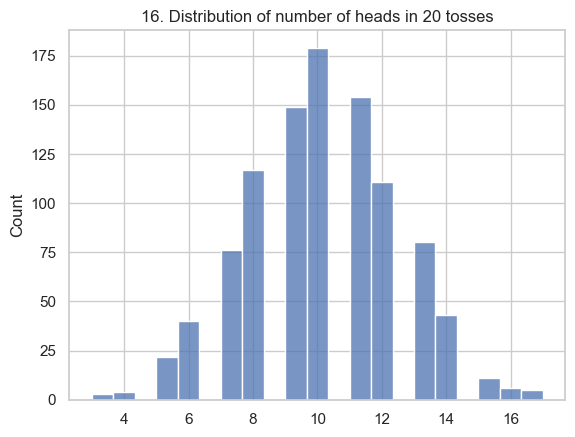

In [34]:
# 16. Simulate 1000 experiments of 20 coin tosses
heads16 = np.random.binomial(20, 0.5, 1000)
sns.histplot(heads16, bins=21, kde=False)
plt.title("16. Distribution of number of heads in 20 tosses")
plt.show()

In [35]:
# 17. Probability of at least 15 heads
p17 = 1 - stats.binom.cdf(14, 20, 0.5)
print("17. P(X>=15) =", p17)

17. P(X>=15) = 0.020694732666015625


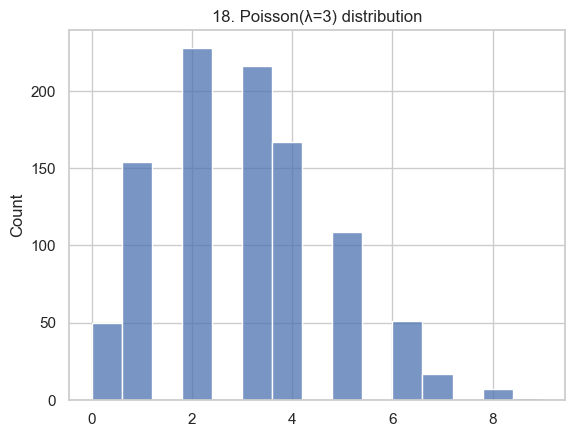

In [36]:
# 18. Poisson samples λ=3
poisson18 = np.random.poisson(3,1000)
sns.histplot(poisson18, bins=15, kde=False)
plt.title("18. Poisson(λ=3) distribution")
plt.show()


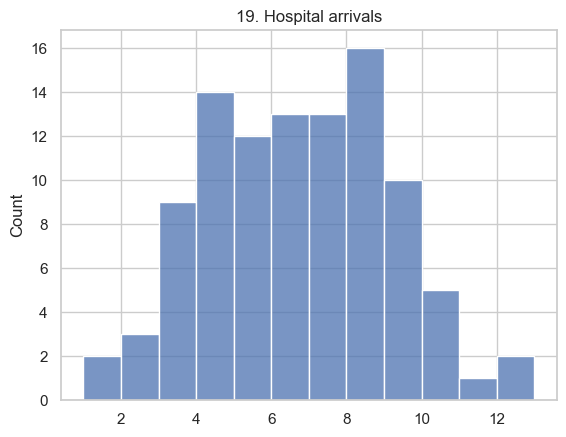

In [37]:
# 19. Hospital arrivals avg 6/hour, 100 hours
hospital19 = np.random.poisson(6,100)
sns.histplot(hospital19, bins=12, kde=False)
plt.title("19. Hospital arrivals")
plt.show()

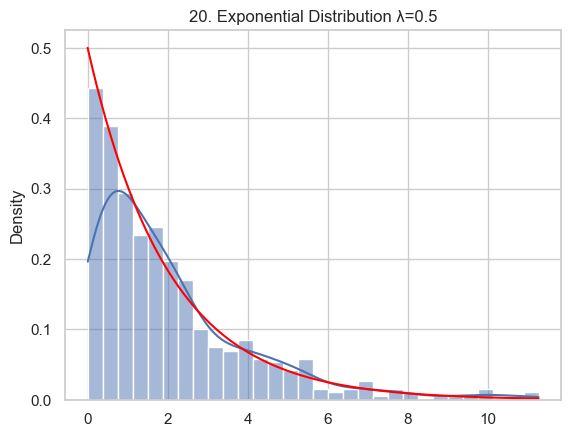

In [38]:
# 20. Exponential λ=0.5, 500 samples
exp20 = np.random.exponential(1/0.5,500)
sns.histplot(exp20, bins=30, kde=True, stat='density')
x20 = np.linspace(0, max(exp20), 200)
plt.plot(x20, stats.expon.pdf(x20, scale=1/0.5), color='red')
plt.title("20. Exponential Distribution λ=0.5")
plt.show()

In [39]:
# 21. Probability wait <2 units
prob21_empirical = np.sum(exp20<2)/500
prob21_theoretical = stats.expon.cdf(2, scale=1/0.5)
print("21. Empirical =", prob21_empirical, ", Theoretical =", prob21_theoretical)


21. Empirical = 0.628 , Theoretical = 0.6321205588285577


In [40]:
# 22. Z-score function
def z_scores(data):
    data = np.array(data)
    return (data - data.mean()) / data.std()


In [41]:
print("22. Z-scores:", z_scores([70,85,90,60,75]))


22. Z-scores: [-0.56195149  0.84292723  1.31122014 -1.4985373  -0.09365858]


In [42]:
# 23. Simulate 200 test scores, standardize
data23 = np.random.normal(50,12,200)
z23 = z_scores(data23)
print("23. Mean of Z =", z23.mean(), ", Std of Z =", z23.std())


23. Mean of Z = 1.3988810110276973e-16 , Std of Z = 1.0


-----------------------------
# Part C: Advanced Problems
-----------------------------

In [43]:
# 24. Machine fail prob 0.01, 200 days, exactly 2 failures
p24 = stats.binom.pmf(2, 200, 0.01)
print("24. P(X=2) =", p24)

24. P(X=2) = 0.2720330098636303


In [44]:
# 25. Exponential wait >15, λ=1/5
p25 = 1 - stats.expon.cdf(15, scale=5)
print("25. P(wait>15) =", p25)

25. P(wait>15) = 0.04978706836786395


In [45]:
# 26. Verify mean & variance of Poisson λ
lambda26 = 4
samples26 = np.random.poisson(lambda26, 10000)
print("26. Sample mean =", samples26.mean(), ", Sample var =", samples26.var())


26. Sample mean = 3.9831 , Sample var = 3.8302143899999996


In [46]:
# 27. Standardize exam scores
scores27 = np.random.normal(60,15,500)
z27 = z_scores(scores27)
print("27. Z-scores mean =", z27.mean(), ", std =", z27.std())


27. Z-scores mean = 5.826450433232822e-16 , std = 1.0


In [47]:
# 28. Simulate 10,000 coin flips
flips28 = np.random.binomial(1,0.5,10000)
empirical_probs = [np.sum(flips28==k)/10000 for k in [0,1]]
print("28. Empirical vs theoretical probs (0=tail,1=head):", empirical_probs)


28. Empirical vs theoretical probs (0=tail,1=head): [np.float64(0.5023), np.float64(0.4977)]


In [48]:
# 29. Fit normal distribution
data29 = np.random.normal(100,20,1000)
mu29, sigma29 = stats.norm.fit(data29)
print("29. Fitted μ =", mu29, ", σ =", sigma29)


29. Fitted μ = 101.10679962460365 , σ = 19.78945424587338


In [49]:
# 30. Mini-project: Customer arrivals
lambda30 = 5
hours = 100
arrivals = np.random.poisson(lambda30, hours)
wait_times = np.random.exponential(1/lambda30, hours)


Text(0.5, 1.0, '30a. Customer Arrivals')

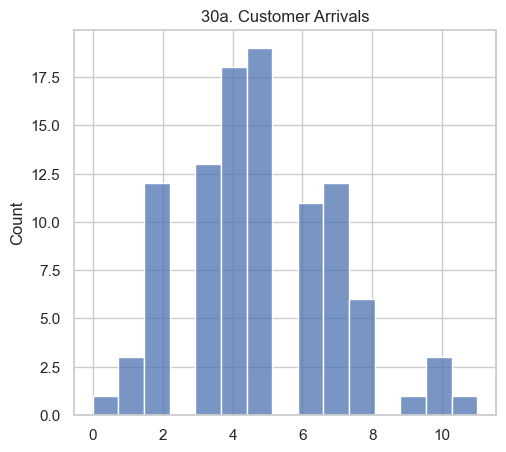

In [50]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(arrivals, bins=15, kde=False)
plt.title("30a. Customer Arrivals")


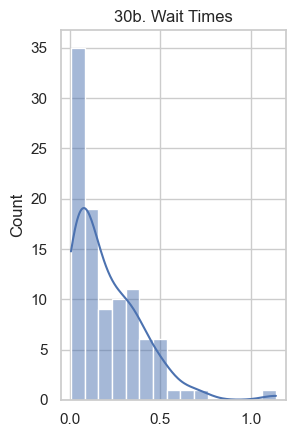

In [51]:
plt.subplot(1,2,2)
sns.histplot(wait_times, bins=15, kde=True)
plt.title("30b. Wait Times")
plt.show()